In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Linear Hypothesis Function
def h(x, theta):
    return np.dot(x, theta).reshape(-1,1)

# Mean Squared Error Function
def mean_squared_error(y_pred, y_label):
    return np.mean((y_pred - y_label) ** 2)

# Bias Column Function
def bias_column(X):
    return np.hstack((np.ones((X.shape[0], 1)), X))

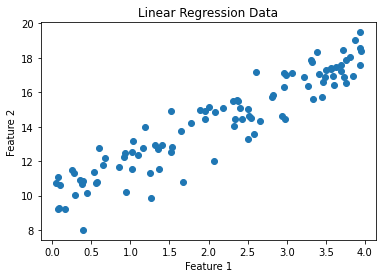

In [8]:
# Least Squares Regression Class
class LeastSquaresRegression:
    def __init__(self):
        self.theta_ = None

    def fit(self, X, y):
        X_bias = bias_column(X)
        self.theta_ = np.linalg.pinv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)

    def predict(self, X):
        X_bias = bias_column(X)
        return X_bias.dot(self.theta_)

# Generating Random Data
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

# Plotting the Data
plt.scatter(X, y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear Regression Data')
plt.show()


[[9.89837643]
 [2.0684977 ]]


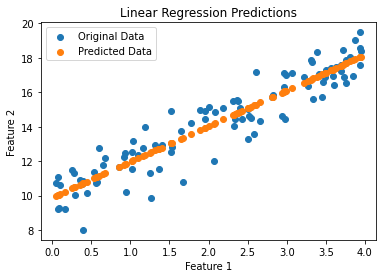

In [9]:
# Calculating Weights
model = LeastSquaresRegression()
model.fit(X, y)
print(model.theta_)

# Predicting Values
y_new = model.predict(X)

# Plotting Predicted Values
def my_plot(X, y, y_new):
    plt.scatter(X, y, label='Original Data')
    plt.scatter(X, y_new, label='Predicted Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Linear Regression Predictions')
    plt.legend()
    plt.show()

my_plot(X, y, y_new)


In [10]:
# Gradient Descent Optimizer Class 
class GradientDescentOptimizer:
    def __init__(self, f, fprime, start, learning_rate=0.1):
        self.f_ = f
        self.fprime_ = fprime
        self.current_ = start
        self.learning_rate_ = learning_rate
        self.history_ = [start.copy()]

    def step(self):
        grad = self.fprime_(self.current_)
        if grad.ndim == 1:
            self.current_ -= self.learning_rate_ * grad
        else:
            self.current_ -= self.learning_rate_ * grad[:, np.newaxis]
        self.history_.append(self.current_.copy())

    def optimize(self, iterations=100):
        for _ in range(iterations):
            self.step()

    def getCurrentValue(self):
        return self.current_

    def print_result(self):
        print("Best theta found is", self.current_)
        print("Value of f at this theta: f(theta) =", self.f_(self.current_))
        print("Value of f prime at this theta: f'(theta) =", self.fprime_(self.current_))

# Using the Gradient Descent Optimizer
def f(x):
    return 3 + np.sum((x - np.array([2, 6])) ** 2)

def fprime(x):
    return 2 * (x - np.array([2, 6]))

grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()

Best theta found is [1.76045938 5.42391613]
Value of f at this theta: f(theta) = 3.3892523350134187
Value of f prime at this theta: f'(theta) = [-0.47908123 -1.15216774]


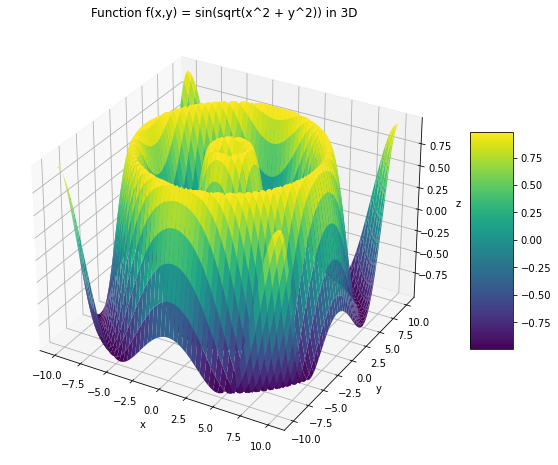

In [11]:
# Plotting the Function f in 3D
def f(XY):
    X, Y = XY
    return np.sin(np.sqrt(X**2 + Y**2))

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.array([X, Y]))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Function f(x,y) = sin(sqrt(x^2 + y^2)) in 3D')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

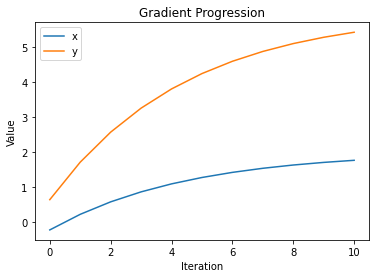

In [12]:
# Plotting the Progression of the Gradient
x_history = [val[0] for val in grad.history_]
y_history = [val[1] for val in grad.history_]
iterations = list(range(len(x_history)))
plt.plot(iterations, x_history, label='x')
plt.plot(iterations, y_history, label='y')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Gradient Progression')
plt.legend()
plt.show()
